In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [ ]:
import pandas as pd
#from sklearn import datasets
#iris= load_iris()
path = r'C:\Users\14438\Downloads'
os.chdir(path)

In [4]:
data=pd.read_csv('User_Data.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
#Extracting Independent and dependent Variable  
x= data.iloc[:, [2,3]].values  
y= data.iloc[:, 4].values 

In [11]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=109)

In [12]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)# Step 3: Train the model on the data
clf.fit(x_train, y_train)# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
y_pred=clf.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[70, 10],
       [ 3, 37]], dtype=int64)

[Text(167.4, 181.2, 'X[0] <= 42.5\ngini = 0.465\nsamples = 280\nvalue = [177, 103]'),
 Text(83.7, 108.72, 'X[1] <= 90500.0\ngini = 0.271\nsamples = 198\nvalue = [166, 32]'),
 Text(41.85, 36.23999999999998, 'gini = 0.069\nsamples = 168\nvalue = [162, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.231\nsamples = 30\nvalue = [4, 26]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 46.5\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(209.25, 36.23999999999998, 'gini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(292.95, 36.23999999999998, 'gini = 0.168\nsamples = 65\nvalue = [6, 59]')]

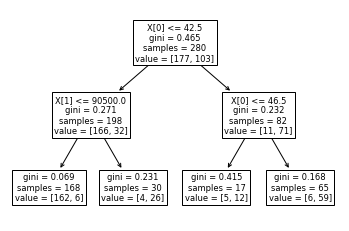

In [18]:
tree.plot_tree(clf)

In [19]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        80
           1       0.79      0.93      0.85        40

    accuracy                           0.89       120
   macro avg       0.87      0.90      0.88       120
weighted avg       0.90      0.89      0.89       120



In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[72  8]
 [ 4 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        80
           1       0.82      0.90      0.86        40

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120

Accuracy: 0.9


In [30]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

AttributeError: 'DataFrame' object has no attribute 'feature_names'